<a href="https://colab.research.google.com/github/Jungin1020/Aiffel_exp/blob/main/2022_03_02_exp_15_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install keras-ocr
!pip3 install -U matplotlib

In [3]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:
!pip3 install pytesseract

In [5]:
!sudo apt install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


##OCR (Optical Character Recognition) detection + recognition
##영화 포스터로 비교해보기




##keras-ocr

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline() # detector, recognizer 자동 다운

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


##1) 흑백

In [7]:
image_urls = [
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster01.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster02.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster03.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster04.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster05.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster06.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster07.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster08.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster09.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_poster10.png'
              ] #이거 어떻게 간단하게 바꾸지...
images = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

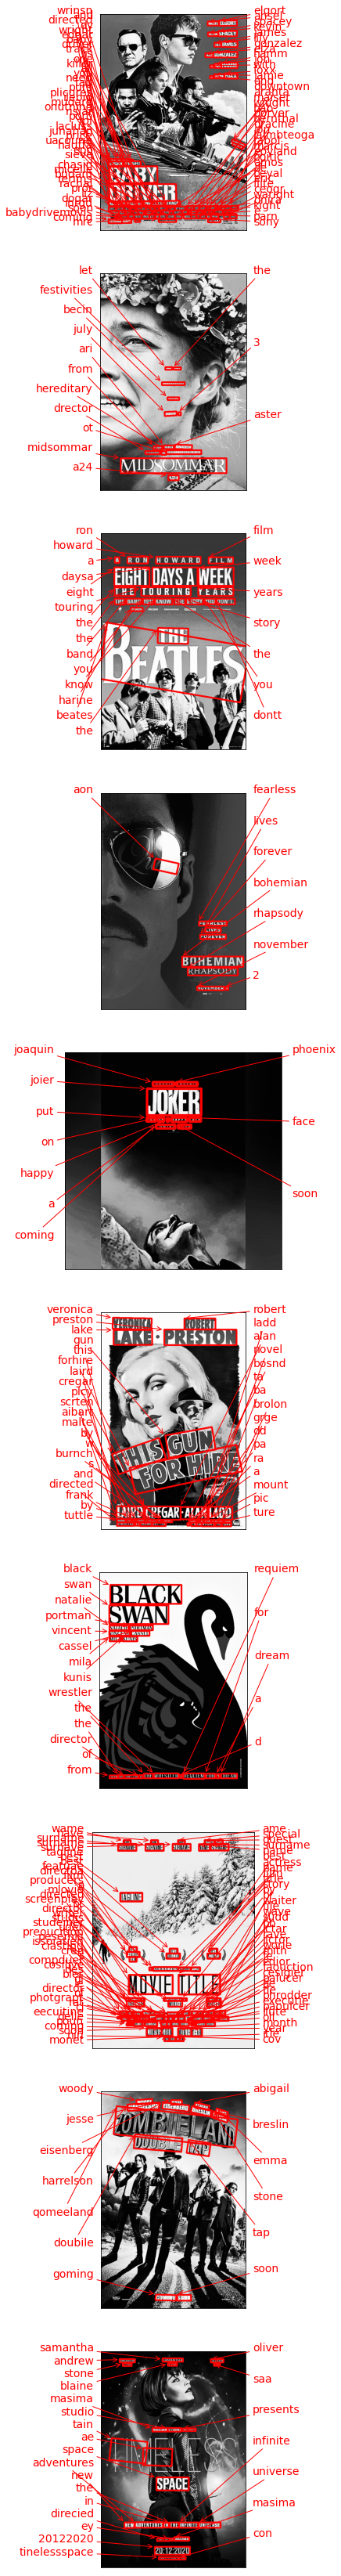

In [21]:
fig, axs = plt.subplots(nrows=len(images), figsize=(40,60))
for idx, ax in enumerate(axs):
  keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0],ax=ax)

##1) 컬러

In [22]:
image_urls = [
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster01.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster02.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster03.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster04.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster05.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster06.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster07.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster08.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster09.png',
              '/content/drive/MyDrive/aiffel/ocr_python/poster/reshaped_color_poster10.png'
              ] 
images = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

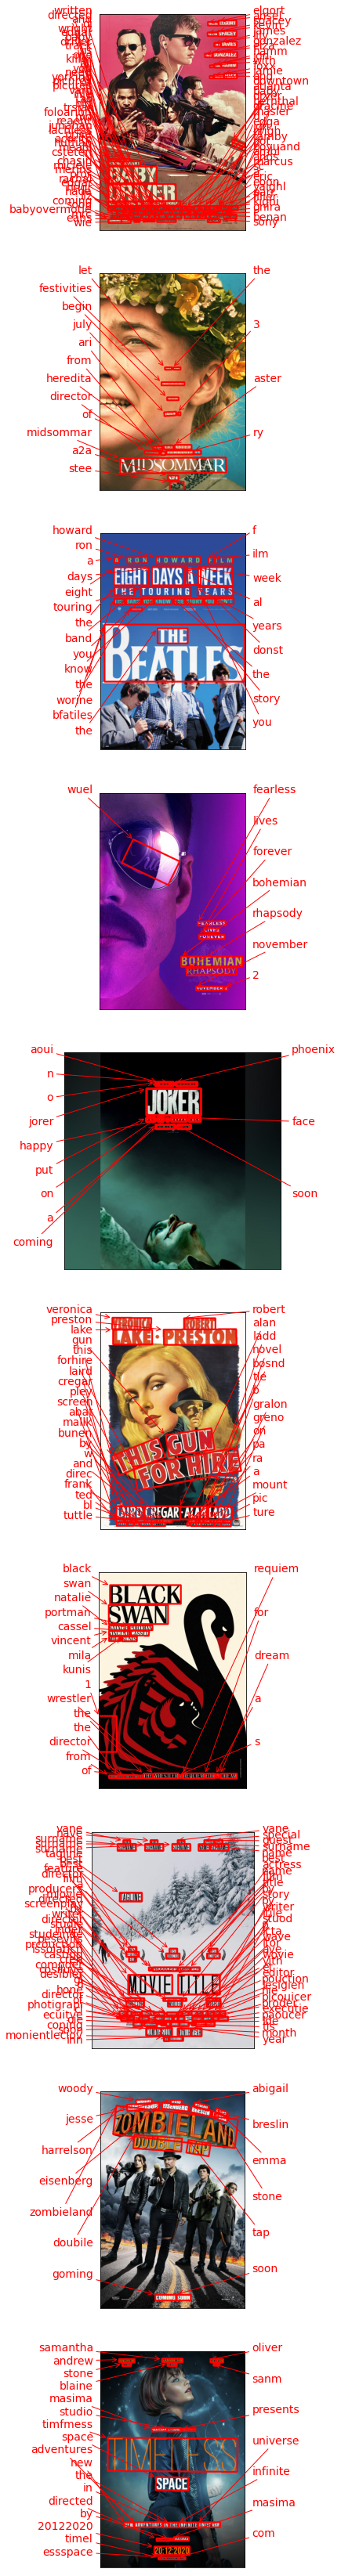

In [23]:
fig, axs = plt.subplots(nrows=len(images), figsize=(40,60))
for idx, ax in enumerate(axs):
  keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0],ax=ax)

- 작은 글자도 세세하게 포착한다
- 크기에 상관 없이 잘 인식하고 일부가 가려진 글자(Beatles), 기울어진 글자도 잘 detect했다
- 컬러일 때 더 정확하게 detect하는 부분이 있다(Beatles, Timeless 등)
- recognition도 컬러가 정확한 부분이 있다(Zombieland)
- 컬러가 있는게 detection와 recognition에 도움이 되는 걸까?

##tesseract(google)
문자 검출하고 이미지 자르기(detection)

In [12]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output

def crop_word_regions(image_path='./images/sample.png',output_path='./output'):
  if not os.path.exists(output_path):
    os.mkdir(output_path)
  custom_oem_psm_config = r'--oem 3 --psm 3'
  image = Image.open(image_path)

  recognized_data = pytesseract.image_to_data(
      image, lang = 'eng',
      config = custom_oem_psm_config,
      output_type=Output.DICT
  )
  top_level = max(recognized_data['level'])
  index = 0
  cropped_image_path_list = []
  for i in range(len(recognized_data['level'])):
    level = recognized_data['level'][i]

    if level == top_level:
      left = recognized_data['left'][i]
      top = recognized_data['top'][i]
      width = recognized_data['width'][i]
      height = recognized_data['height'][i]

      output_img_path = os.path.join(output_path, f'{str(index).zfill(4)}.png')
      print(output_img_path)
      cropped_image = image.crop((
          left,
          top,
          left+width,
          top+height
      ))
      cropped_image.save(output_img_path)
      cropped_image_path_list.append(output_img_path)
      index += 1
  return cropped_image_path_list

work_dir = '/content/drive/MyDrive/aiffel/ocr_python/poster'


In [13]:
img_file_path = work_dir + '/reshaped_poster01.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/content/drive/MyDrive/aiffel/ocr_python/poster/0000.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0001.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0002.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0003.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0004.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0005.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0006.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0007.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0008.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0009.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0010.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0011.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0012.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0013.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0014.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0015.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0016.png
/content/drive/MyDrive/aiffel/o

잘린 이미지에서 단어 인식하기

In [14]:
def recognize_images(cropped_image_path_list):
  custom_oem_psm_config = r'--oem 3 --psm 7'

  for image_path in cropped_image_path_list:
    image = Image.open(image_path)
    recognized_data = pytesseract.image_to_string(
        image, lang = 'eng',
        config = custom_oem_psm_config,
        output_type = Output.DICT
    )
    print(recognized_data['text'])
  print('Done')

In [15]:
recognize_images(cropped_image_path_list)

rN



ae |

ce for we 4

yar j=

ae

ANSEL

FLGORT

fal

SPACEY

tik

Pye

ara:

SU rae re

wn JON HAMM

Perey i 3

ge

D4

Done


- 제목 baby driver를 잡아내지 못했다.
- 큰 글씨를 못 잡는 듯하다
- 전반적으로 recognition이 이상하다

In [19]:
img_file_path = work_dir + '/reshaped_poster03.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/content/drive/MyDrive/aiffel/ocr_python/poster/0000.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0001.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0002.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0003.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0004.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0005.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0006.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0007.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0008.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0009.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0010.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0011.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0012.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0013.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0014.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0015.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0016.png
/content/drive/MyDrive/aiffel/o

In [20]:
recognize_images(cropped_image_path_list)

fs

RO N

HOWARD

an oe


aaa

TH

F TOURING YEARS

THE


alt

Gi ths

TRE

STORY

YOU

UU we


i

(Aree


Done


- 또 큰 글씨인 제목 the beatles는 잡아내지 못함

- the는 잡아냈다

- dectection은 잘 했는데 recognition이 틀린 경우가 많다

컬러로 하면 좀 나으려나?

In [26]:
img_file_path = work_dir + '/reshaped_color_poster03.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/content/drive/MyDrive/aiffel/ocr_python/poster/0000.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0001.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0002.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0003.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0004.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0005.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0006.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0007.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0008.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0009.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0010.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0011.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0012.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0013.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0014.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0015.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0016.png
/content/drive/MyDrive/aiffel/o

In [27]:
recognize_images(cropped_image_path_list)

Pa

iain,

~~ i) WAR U

a ie ees

abil

Wives

f\

WEEK

TRE

TOURING

oe a

eels

RANI) Y¥

il

KANG

‘es

=

baths,

4

Atltm

18

ye

_

,

<x


Done


- 더 많은 detection이 나왔으나
- 정확도는 더 안 좋은 것 같다

In [24]:
img_file_path = work_dir + '/reshaped_poster06.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/content/drive/MyDrive/aiffel/ocr_python/poster/0000.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0001.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0002.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0003.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0004.png
/content/drive/MyDrive/aiffel/ocr_python/poster/0005.png


In [25]:
recognize_images(cropped_image_path_list)

VERONICA

PORERT

LAKE

I

PRESTON

iD

Done


- 기울어진 글씨 못잡아낸다
- 비교적 크고 뚜렷한 글자 이미지는 잘 인식한다

##회고

- 단어 위주인 영화 포스터에서 keras ocr이 압도적으로 좋은 성능을 보였다.
- 문장 단위로 테스트하면 결과가 달라지려나 싶지만 tesseract는 recognition에서 너무 오류가 많아서 신뢰가 가질 않는다.